In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os

In [ ]:
pip install split-folders

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-09-30 04:01:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  32.6MB/s    in 11s     

2020-09-30 04:01:42 (26.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [ ]:
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 3304.68 files/s]


In [ ]:
rock_dir = os.path.join (base_dir, 'rock')
paper_dir = os.path.join (base_dir, 'paper')
scissors_dir = os.path.join (base_dir, 'scissors')

In [ ]:
# Memecah direktori rock menjadi data train dan validasi data
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.2)

# Memecah direktori kertas menjadi data train dan validasi data
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.2)

# Memecah direktori rock menjadi data train dan validasi data
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.2)

In [ ]:
train_rock = os.path.join (train_dir, 'rock')
train_paper = os.path.join (train_dir, 'paper')
train_scissors = os.path.join (train_dir, 'scissors')
val_rock = os.path.join (validation_dir, 'rock')
val_paper = os.path.join (validation_dir, 'paper')
val_scissors = os.path.join (validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical'
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                       
])

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer = tf.optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
)

Epoch 1/20
25/25 [==============================] - 38s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9937
Epoch 2/20
25/25 [==============================] - 38s 2s/step - loss: 0.0044 - accuracy: 0.9975 - val_loss: 0.0144 - val_accuracy: 0.9937
Epoch 3/20
25/25 [==============================] - 41s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9812
Epoch 4/20
25/25 [==============================] - 38s 2s/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0774 - val_accuracy: 0.9812
Epoch 5/20
25/25 [==============================] - 38s 2s/step - loss: 0.0085 - accuracy: 0.9950 - val_loss: 0.1179 - val_accuracy: 0.9875
Epoch 6/20
25/25 [==============================] - 38s 2s/step - loss: 0.0144 - accuracy: 0.9975 - val_loss: 0.2205 - val_accuracy: 0.9563
Epoch 7/20
25/25 [==============================] - 38s 2s/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0090 - val_accuracy: 0.9937
Epoch 8/20
25/25 [==

Saving Scissors.jpg to Scissors.jpg
Scissors.jpg
Scissors


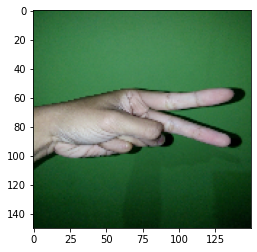

In [ ]:
# Melihat hasil dari model yang telah dibuat

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as mping
import matplotlib.pyplot as plt
import matplotlib.pyplot as mping
%matplotlib inline 

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images=np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')
  else:
    print('Not Sure')

Nama: Muhammad Hamzah Fyrzatullah

Alamat: Tambun Selatan Kab.Bekasi

Email: muhammadhamzahf@gmail.com